Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import kagglehub as kh

c:\Users\david\Code\Cotton\envVir\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = kh.dataset_download("seroshkarim/cotton-leaf-disease-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\david\.cache\kagglehub\datasets\seroshkarim\cotton-leaf-disease-dataset\versions\1


Data Preprocessing
Training Image Processing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'cottonImage',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256,256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 1710 files belonging to 4 classes.


Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 539 files belonging to 4 classes.


In [5]:
training_set


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
     print(x,x.shape)
     print(y,y.shape)
     break

tf.Tensor(
[[[[1.58273239e+02 1.36273239e+02 7.92732391e+01]
   [1.68456451e+02 1.46415436e+02 8.95384827e+01]
   [1.70135864e+02 1.47135864e+02 9.31358719e+01]
   ...
   [1.32972824e+02 1.18109543e+02 7.54799576e+01]
   [1.54548950e+02 1.39548950e+02 9.65622559e+01]
   [1.68762512e+02 1.51789856e+02 1.07963417e+02]]

  [[2.05582825e+02 1.83582825e+02 1.26582825e+02]
   [1.96367477e+02 1.74326462e+02 1.17449509e+02]
   [1.76399765e+02 1.53399765e+02 9.93997650e+01]
   ...
   [1.27774025e+02 1.13397072e+02 7.33013687e+01]
   [1.31480713e+02 1.17433426e+02 7.50217361e+01]
   [1.42020325e+02 1.26020325e+02 8.39863281e+01]]

  [[2.22697433e+02 1.99886887e+02 1.45318527e+02]
   [2.23631027e+02 2.00812714e+02 1.46267670e+02]
   [2.04330795e+02 1.81330795e+02 1.27330795e+02]
   ...
   [1.18212196e+02 1.04348915e+02 6.69016495e+01]
   [1.20945023e+02 1.07126701e+02 6.76481476e+01]
   [1.39794113e+02 1.24810379e+02 8.54288788e+01]]

  ...

  [[2.02918610e+02 2.51865875e+02 1.41539703e+02]
   [2

Building Model

In [7]:

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential()

In [9]:
## Building Convolution layer

In [10]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

c:\Users\david\Code\Cotton\envVir\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [12]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [13]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [14]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [15]:
model.add(Dropout(0.25))

In [16]:
model.add(Flatten())

In [17]:
model.add(tf.keras.layers.Dense(2048, activation="relu"))  # Example: Adjust neurons

In [18]:
model.add(Dense(units=1500,activation='relu'))

In [19]:
model.add(Dropout(0.4))

In [20]:
model.add(Dense(units=4,activation='softmax'))

# Compiling Model

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 254, 254, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 127, 127, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 125, 125, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │    37,750,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         6,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,542,512 (173.73 MB)

 Trainable params: 45,542,512 (173.73 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [43]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 226s 4s/step - accuracy: 0.9444 - loss: 0.1583 - val_accuracy: 0.8776 - val_loss: 0.3563
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 219s 4s/step - accuracy: 0.9515 - loss: 0.1324 - val_accuracy: 0.9017 - val_loss: 0.3622
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 215s 4s/step - accuracy: 0.9498 - loss: 0.1391 - val_accuracy: 0.9221 - val_loss: 0.2599
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 217s 4s/step - accuracy: 0.9872 - loss: 0.0521 - val_accuracy: 0.9351 - val_loss: 0.3596
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 214s 4s/step - accuracy: 0.9892 - loss: 0.0319 - val_accuracy: 0.8924 - val_loss: 0.5443
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 214s 4s/step - accuracy: 0.9686 - loss: 0.1127 - val_accuracy: 0.9239 - val_loss: 0.3439
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 7475s 141s/step - accuracy: 0.9832 - loss: 0.0569 - val_accuracy: 0.9184 - val_loss: 0.2828
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 188s 3s/step - accuracy: 0.9789 - loss: 0.0574 - val_accuracy: 0.9276 


## Model Evaluation

In [24]:
# Model Evaluation on Training Set
train_loss,train_acc = model.evaluate(training_set)

54/54 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9606 - loss: 0.1339


In [25]:
print(train_loss,train_acc)

0.11750359833240509 0.9701754450798035


In [26]:
# Model Evaluation on Validation Set
val_loss,val_acc = model.evaluate(validation_set)

17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8891 - loss: 0.3716


In [27]:
print(val_loss,val_acc)

0.4118056893348694 0.8868274688720703



## Saving Model

In [44]:
model.save("trained_model3.keras")

In [46]:
training_history.history

{'accuracy': [0.9426900744438171,
  0.9502924084663391,
  0.9596491456031799,
  0.9830409288406372,
  0.9877192974090576,
  0.9766082167625427,
  0.9754385948181152,
  0.9824561476707458,
  0.9684210419654846,
  0.9812865257263184],
 'loss': [0.16785883903503418,
  0.1389504075050354,
  0.11222943663597107,
  0.05537990480661392,
  0.03593749925494194,
  0.07275247573852539,
  0.07615617662668228,
  0.047765061259269714,
  0.08317797631025314,
  0.05576955899596214],
 'val_accuracy': [0.8775510191917419,
  0.9016697406768799,
  0.9220778942108154,
  0.9350649118423462,
  0.8923933506011963,
  0.923933207988739,
  0.918367326259613,
  0.9276437759399414,
  0.9369202256202698,
  0.9332096576690674],
 'val_loss': [0.3563070297241211,
  0.36224159598350525,
  0.2599303424358368,
  0.3595602512359619,
  0.5443340539932251,
  0.3438650071620941,
  0.2827639877796173,
  0.33697909116744995,
  0.1874433308839798,
  0.27889344096183777]}

In [47]:
## Recording History in json
import json
with open ("training_hist.json","w") as f:
    json.dump(training_history.history,f)

## Accuracy Visualization

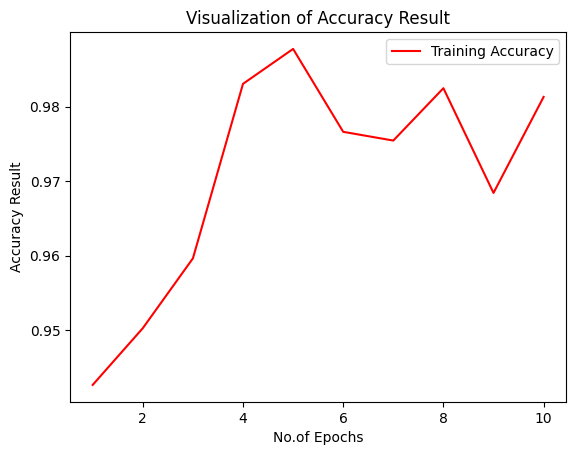

In [52]:
epochs = [i for i in range (1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
# plt.plot(epochs,training_history.history['loss'],color='blue',label='Loss')
plt.xlabel("No.of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Some Other metrics for model evaluation

In [53]:
class_name = validation_set.class_names
class_name

['bacterial_blight', 'curl_virus', 'fussarium_wilt', 'healthy']

In [54]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 241 files belonging to 4 classes.


In [55]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 976ms/step


(array([[1.26094716e-02, 9.86645401e-01, 6.94902090e-04, 5.02517178e-05],
        [2.72068996e-02, 3.64281208e-04, 2.92572113e-05, 9.72399533e-01],
        [3.34592387e-02, 9.65898275e-01, 4.38239338e-04, 2.04281823e-04],
        [2.80731238e-05, 2.21279794e-08, 2.58941134e-03, 9.97382462e-01],
        [9.98831451e-01, 1.35203220e-06, 1.12153438e-03, 4.57154019e-05],
        [1.19063498e-06, 9.99978781e-01, 1.99369788e-05, 6.27095957e-08],
        [7.20308803e-04, 9.99027371e-01, 2.51702848e-04, 5.69004328e-07],
        [9.41266953e-10, 1.64379170e-11, 9.79337306e-11, 1.00000000e+00],
        [6.71993092e-08, 9.99799073e-01, 2.00893803e-04, 1.01203707e-13],
        [5.31336468e-07, 9.99985695e-01, 2.82677593e-06, 1.09777875e-05],
        [9.99861002e-01, 4.79973664e-07, 1.34884758e-04, 3.60949707e-06],
        [5.80280907e-02, 8.38543475e-01, 1.53674092e-02, 8.80609602e-02],
        [7.95028448e-01, 6.46776408e-02, 7.08290900e-04, 1.39585659e-01],
        [1.32509915e-03, 9.93269622e-0

In [35]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [36]:
predicted_categories

<tf.Tensor: shape=(241,), dtype=int64, numpy=
array([1, 1, 3, 1, 2, 3, 1, 1, 1, 3, 1, 1, 1, 1, 0, 0, 2, 0, 0, 3, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1,
       0, 0, 2, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 3, 1, 1, 0, 2, 3, 1,
       1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 3, 1, 0, 0, 1, 1, 1, 1, 3,
       1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 3, 1, 1, 1, 3, 1, 0, 1, 1, 1, 3, 0,
       0, 3, 1, 0, 1, 3, 1, 1, 1, 2, 2, 1, 1, 3, 1, 3, 0, 3, 1, 1, 1, 0,
       1, 1, 3, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0,
       1, 3, 3, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 3, 0, 0, 1, 3, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 3, 1, 1, 3, 1, 1, 1, 0,
       3, 0, 1, 0, 3, 3, 3, 1, 3, 3, 0, 1, 3, 1, 0, 1, 1, 0, 1, 3, 1])>

In [37]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(241, 4), dtype=float32, numpy=
array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],


In [38]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(241,), dtype=int64, numpy=
array([3, 3, 1, 0, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 0, 0, 1, 3, 1, 3, 0, 1, 0, 0, 3, 3, 3, 1, 3, 3, 3, 0, 3, 3, 1,
       1, 1, 3, 3, 1, 1, 1, 0, 3, 1, 0, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 3,
       3, 3, 3, 0, 1, 3, 1, 1, 1, 1, 1, 3, 3, 0, 1, 0, 0, 3, 0, 0, 3, 0,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 0, 1, 1, 3, 0, 3, 0,
       3, 3, 1, 3, 3, 3, 3, 3, 1, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3,
       0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3,
       1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 0, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1,
       1, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 1, 0, 3, 1, 3, 3, 3, 3, 1, 0, 3,
       3, 3, 1, 0, 3, 3, 1, 0, 1, 3, 1, 1, 1, 1, 0, 3, 0, 0, 3, 3, 1, 3,
       3, 3, 3, 0, 1, 3, 0, 1, 0, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3])>

In [39]:
from sklearn.metrics import classification_report , confusion_matrix

In [40]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                  precision    recall  f1-score   support

bacterial_blight       0.12      0.15      0.13        40
      curl_virus       0.20      0.48      0.28        58
  fussarium_wilt       0.00      0.00      0.00         0
         healthy       0.58      0.15      0.23       143

        accuracy                           0.23       241
       macro avg       0.23      0.19      0.16       241
    weighted avg       0.41      0.23      0.23       241



c:\Users\david\Code\Cotton\envVir\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\david\Code\Cotton\envVir\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\david\Code\Cotton\envVir\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
cm= confusion_matrix(Y_true,predicted_categories)
cm

array([[ 6, 22,  3,  9],
       [19, 28,  5,  6],
       [ 0,  0,  0,  0],
       [24, 90,  8, 21]])

## Confusin Matrix Visualization

<Axes: >

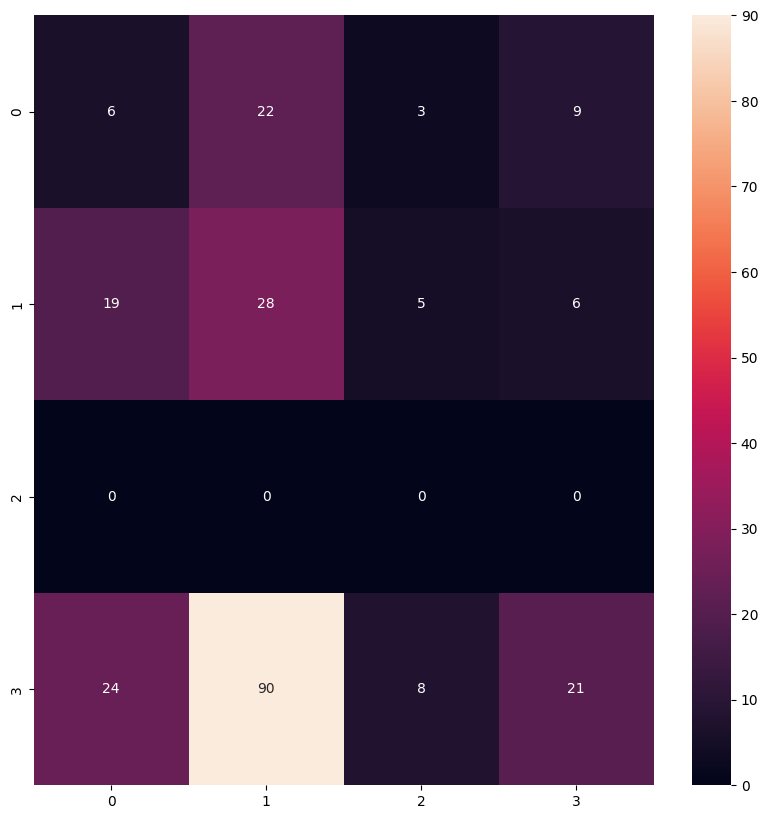

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)